In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from google.colab import drive

In [ ]:
# Import data's files
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Thesis/Training_BOP.csv', low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Thesis/Testing_BOP.csv', low_memory=False)

Mounted at /content/drive


In [ ]:
# Data info
print("Train Data Info:")
print(train.info())
print("Test Data Info:")
print(test.info())

# First 5 rows
print("First 5 rows of Train Data:")
print(train.head())

# Last 5 rows
print("Last 5 rows of Train Data:")
print(train.tail())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_a

In [ ]:
# Null values (For Train Data)
train.isnull().sum()

,0
sku,0
national_inv,1
lead_time,100894
in_transit_qty,1
forecast_3_month,1
forecast_6_month,1
forecast_9_month,1
sales_1_month,1
sales_3_month,1
sales_6_month,1


In [ ]:
# Percentage of null values (For Train Data)
train.isnull().sum()/train.shape[0]*100

,0
sku,0.000000
national_inv,0.000059
lead_time,5.977625
in_transit_qty,0.000059
forecast_3_month,0.000059
forecast_6_month,0.000059
forecast_9_month,0.000059
sales_1_month,0.000059
sales_3_month,0.000059
sales_6_month,0.000059


In [ ]:
# Null values (For Test Data)
test.isnull().sum()

,0
sku,0
national_inv,1
lead_time,14725
in_transit_qty,1
forecast_3_month,1
forecast_6_month,1
forecast_9_month,1
sales_1_month,1
sales_3_month,1
sales_6_month,1


In [ ]:
# Percentage of null values (For Test Data)
test.isnull().sum()/test.shape[0]*100

,0
sku,0.000000
national_inv,0.000413
lead_time,6.082800
in_transit_qty,0.000413
forecast_3_month,0.000413
forecast_6_month,0.000413
forecast_9_month,0.000413
sales_1_month,0.000413
sales_3_month,0.000413
sales_6_month,0.000413


In [ ]:
# Checking duplicate values (For Test Data)
print(train.duplicated().sum())
# Checking duplicate values (For Test Data)
print(test.duplicated().sum())

0
0


In [ ]:
numeric_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

In [ ]:
# Checking garbage values (For Train Data)
for i in categorical_cols:
  print(train[i].value_counts())
  print("****"*10)

sku
(1687860 rows)    1
1026827           1
1043384           1
1043696           1
1043852           1
                 ..
1045867           1
1045815           1
1045098           1
1044643           1
1044198           1
Name: count, Length: 1687861, dtype: int64
****************************************
potential_issue
No     1686953
Yes        907
Name: count, dtype: int64
****************************************
deck_risk
No     1300377
Yes     387483
Name: count, dtype: int64
****************************************
oe_constraint
No     1687615
Yes        245
Name: count, dtype: int64
****************************************
ppap_risk
No     1484026
Yes     203834
Name: count, dtype: int64
****************************************
stop_auto_buy
Yes    1626774
No       61086
Name: count, dtype: int64
****************************************
rev_stop
No     1687129
Yes        731
Name: count, dtype: int64
****************************************
went_on_backorder
No     1676567
Yes 

In [ ]:
# Checking garbage values (For Test Data)
for i in categorical_cols:
  print(test[i].value_counts())
  print("****"*10)

sku
(242075 rows)    1
3285085          1
3285131          1
3285358          1
3285517          1
                ..
3288567          1
3288487          1
3288245          1
3288094          1
3287918          1
Name: count, Length: 242076, dtype: int64
****************************************
potential_issue
No     241993
Yes        82
Name: count, dtype: int64
****************************************
deck_risk
No     194105
Yes     47970
Name: count, dtype: int64
****************************************
oe_constraint
No     242028
Yes        47
Name: count, dtype: int64
****************************************
ppap_risk
No     213357
Yes     28718
Name: count, dtype: int64
****************************************
stop_auto_buy
Yes    232617
No       9458
Name: count, dtype: int64
****************************************
rev_stop
No     241967
Yes       108
Name: count, dtype: int64
****************************************
went_on_backorder
No     239387
Yes      2688
Name: count, dt

In [ ]:
# Describe Data
print("=== Train Data ===")
print(train.describe().T)

print("=== Test Data ===")
print(test.describe().T)

=== Train Data ===
                       count        mean           std      min   25%    50%  \
national_inv       1687860.0  496.111782  29615.233831 -27256.0  4.00  15.00   
lead_time          1586967.0    7.872267      7.056024      0.0  4.00   8.00   
in_transit_qty     1687860.0   44.052022   1342.741731      0.0  0.00   0.00   
forecast_3_month   1687860.0  178.119284   5026.553102      0.0  0.00   0.00   
forecast_6_month   1687860.0  344.986664   9795.151861      0.0  0.00   0.00   
forecast_9_month   1687860.0  506.364431  14378.923562      0.0  0.00   0.00   
sales_1_month      1687860.0   55.926069   1928.195879      0.0  0.00   0.00   
sales_3_month      1687860.0  175.025930   5192.377625      0.0  0.00   1.00   
sales_6_month      1687860.0  341.728839   9613.167104      0.0  0.00   2.00   
sales_9_month      1687860.0  525.269701  14838.613523      0.0  0.00   4.00   
min_bank           1687860.0   52.772303   1254.983089      0.0  0.00   0.00   
pieces_past_due    16

In [ ]:
# Describe data
print("=== Train Data ===")
train.describe(include="object")

=== Train Data ===


,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,(1687860 rows),No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [ ]:
print("=== Test Data ===")
test.describe(include="object")

=== Test Data ===


,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,242076,242075,242075,242075,242075,242075,242075,242075
unique,242076,2,2,2,2,2,2,2
top,(242075 rows),No,No,No,No,Yes,No,No
freq,1,241993,194105,242028,213357,232617,241967,239387


In [ ]:
# Histogram Plot (For Both Train and Test)
def histogram(df):
  plt.figure(figsize=(15, 20))
  for i, col in enumerate(numeric_cols, 1):
      plt.subplot(5, 3, i)
      plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
      plt.title(f'Histogram of {col}', fontsize=10)
      plt.xlabel(col, fontsize=8)
      plt.ylabel('Frequency', fontsize=8)
      plt.grid(axis='y', alpha=0.5)

  plt.tight_layout()
  return plt.show()

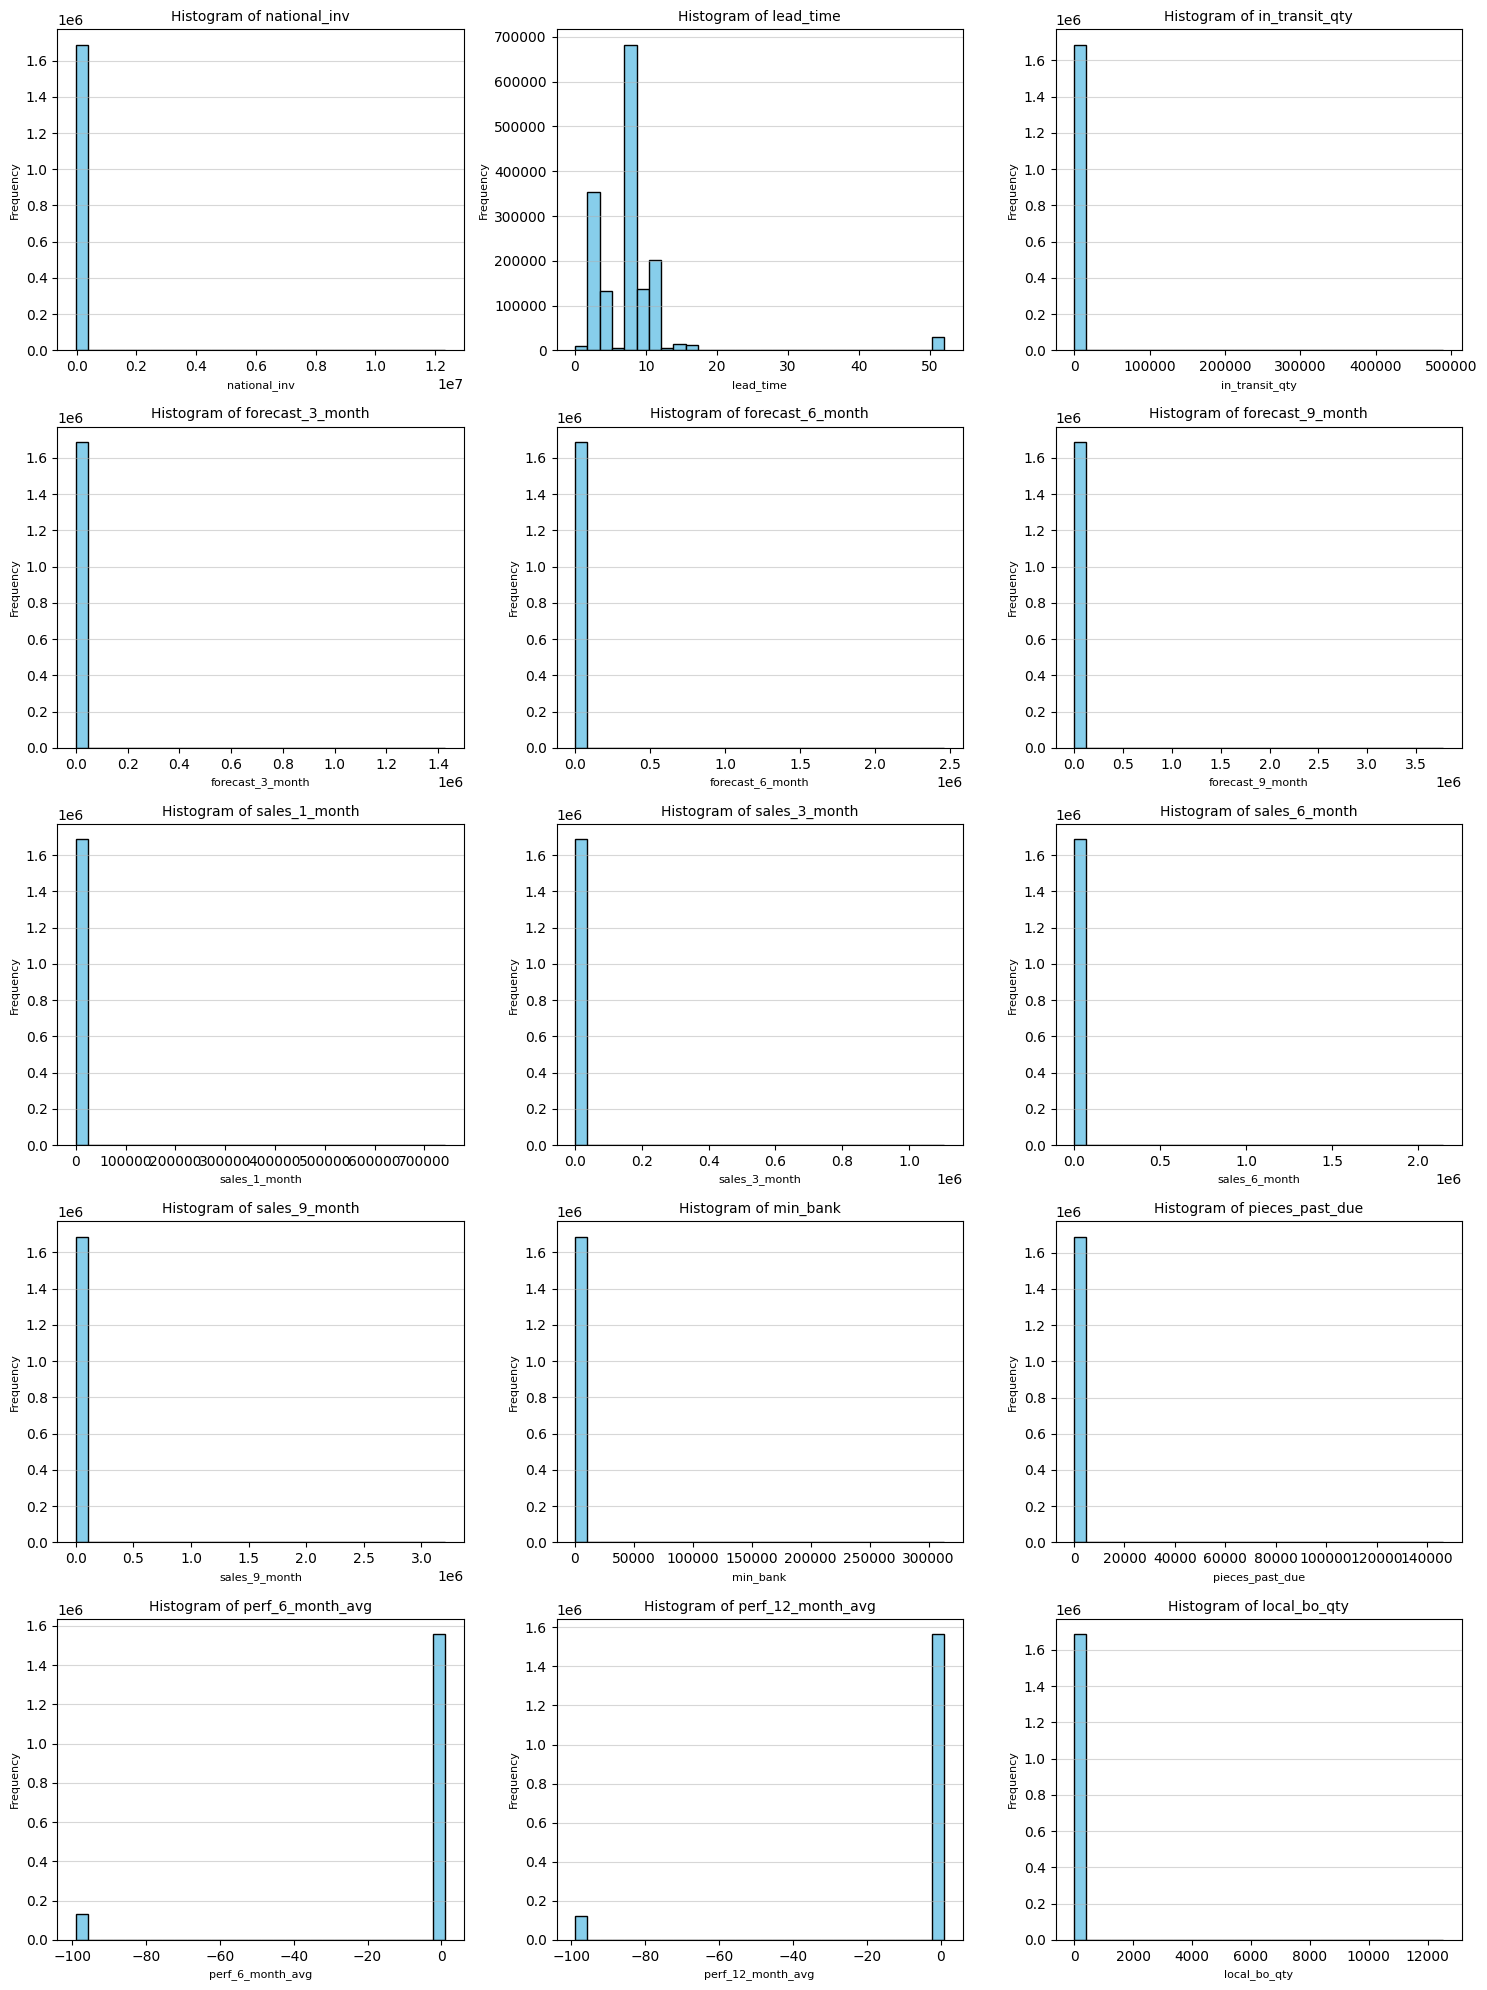

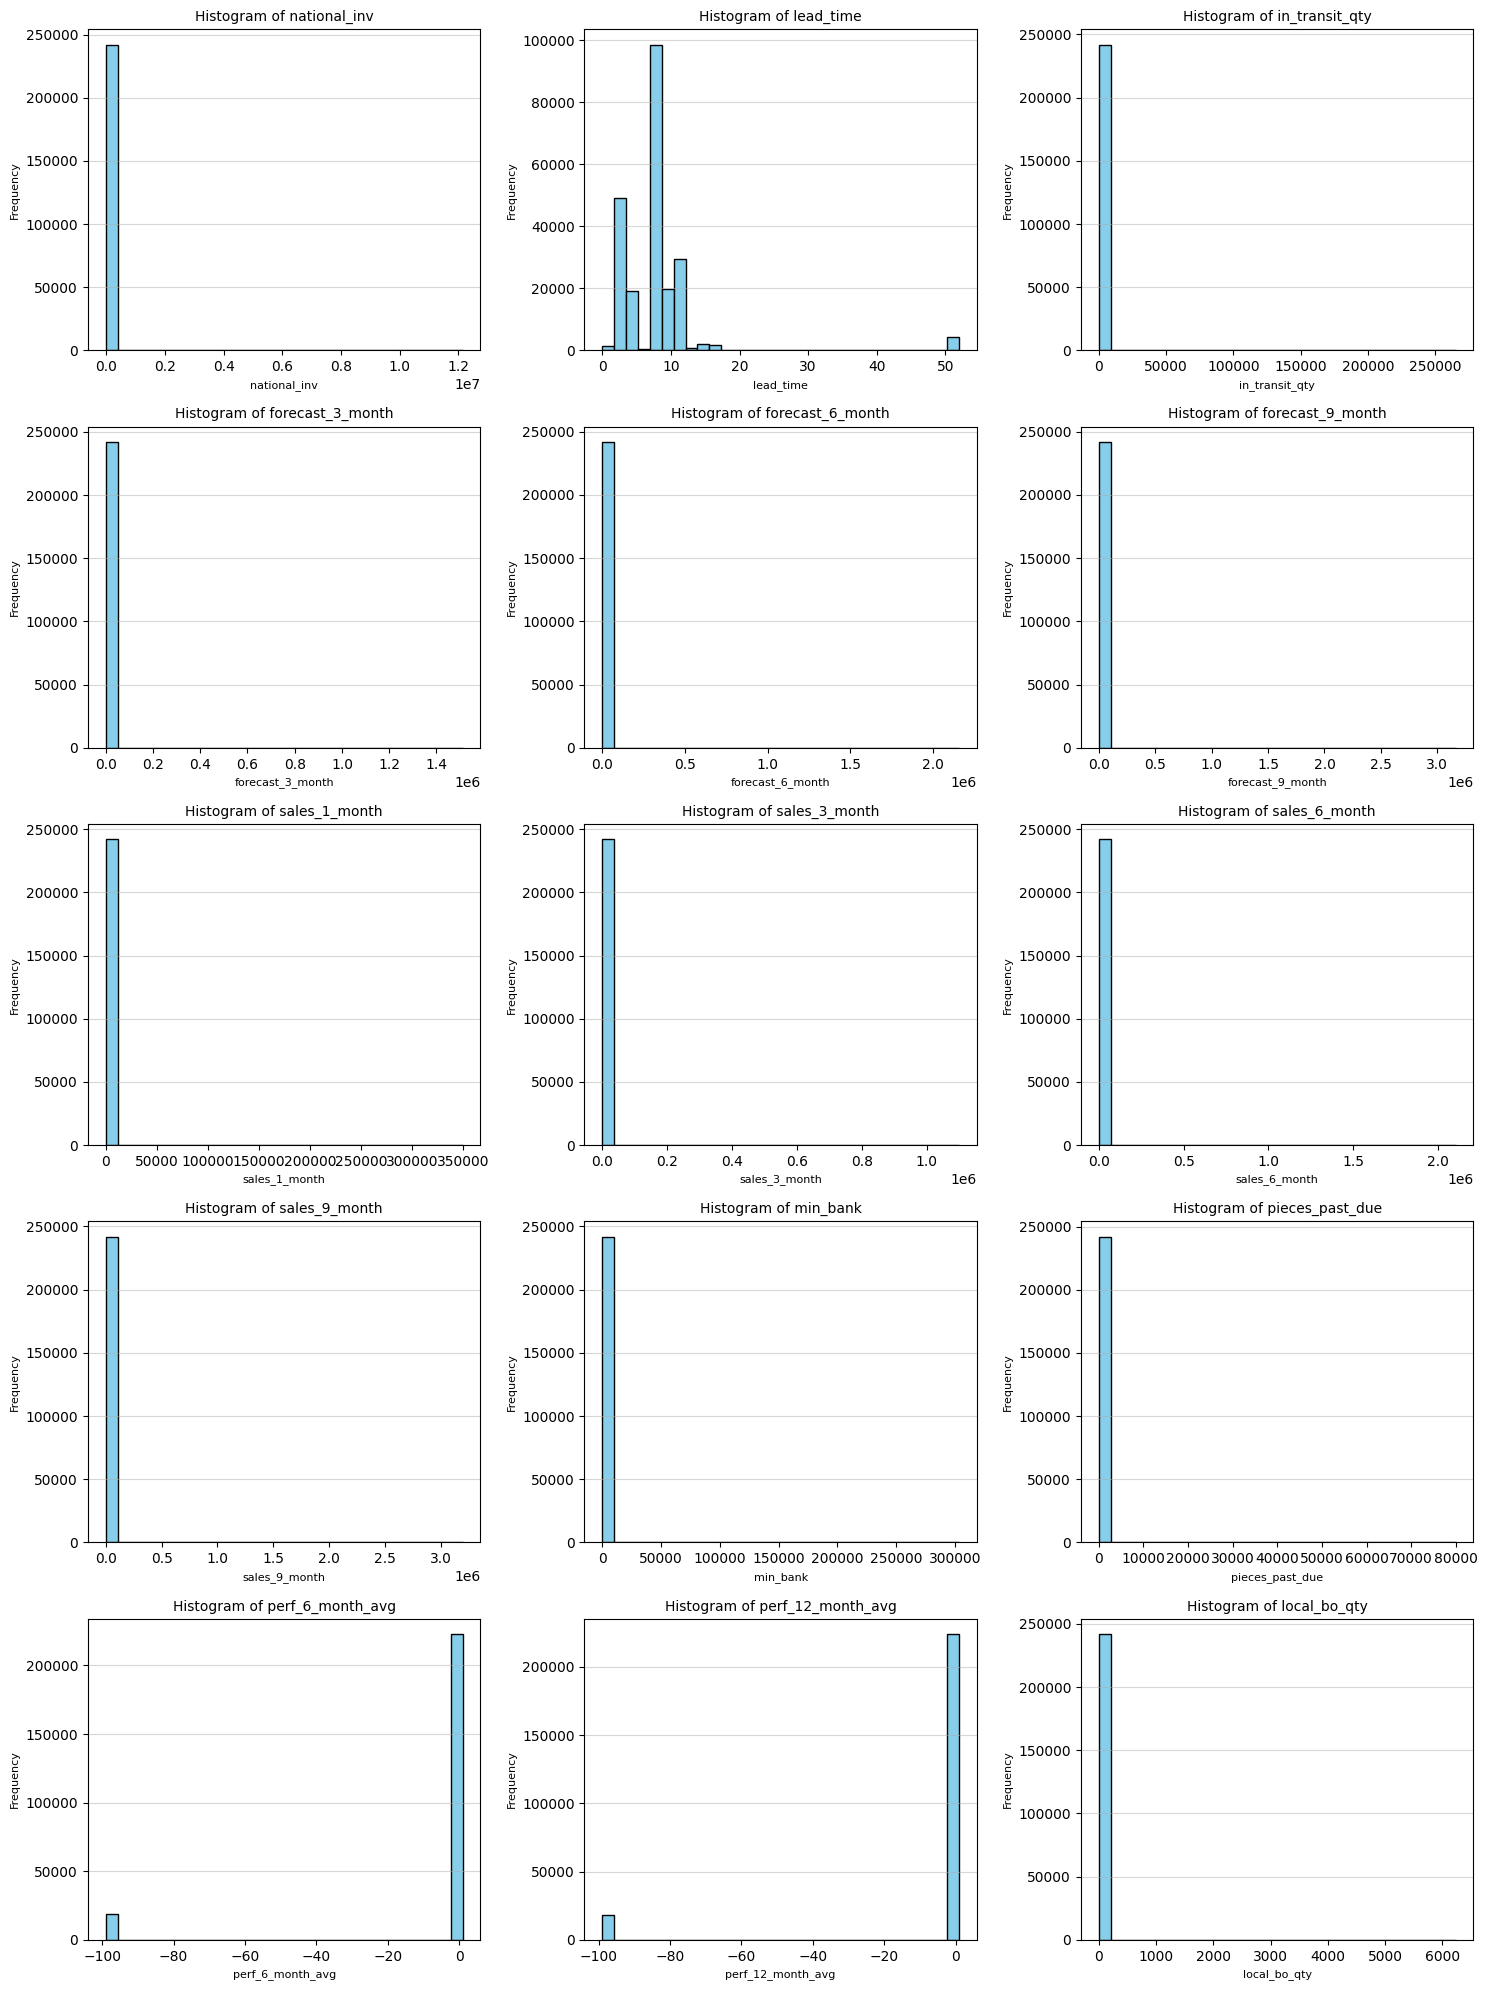

In [ ]:
histogram(train)
histogram(test)

In [ ]:
# Boxplot (For Both Train and Test)
def boxplot(df):
  plt.figure(figsize=(15, 20))
  for i, col in enumerate(numeric_cols, 1):
      plt.subplot(5, 3, i)
      sns.boxplot(data=df, x=col, color='lightblue', flierprops={'marker': 'o', 'markersize': 3, 'markerfacecolor': 'red'})
      plt.title(f'Boxplot of {col}', fontsize=10)
      plt.xlabel('')

      if col in ['national_inv', 'forecast_3_month', 'sales_1_month']:
          q1 = df[col].quantile(0.25)
          q3 = df[col].quantile(0.75)
          iqr = q3 - q1
          plt.xlim(q1 - 3*iqr, q3 + 3*iqr)

  plt.tight_layout()
  return plt.show()

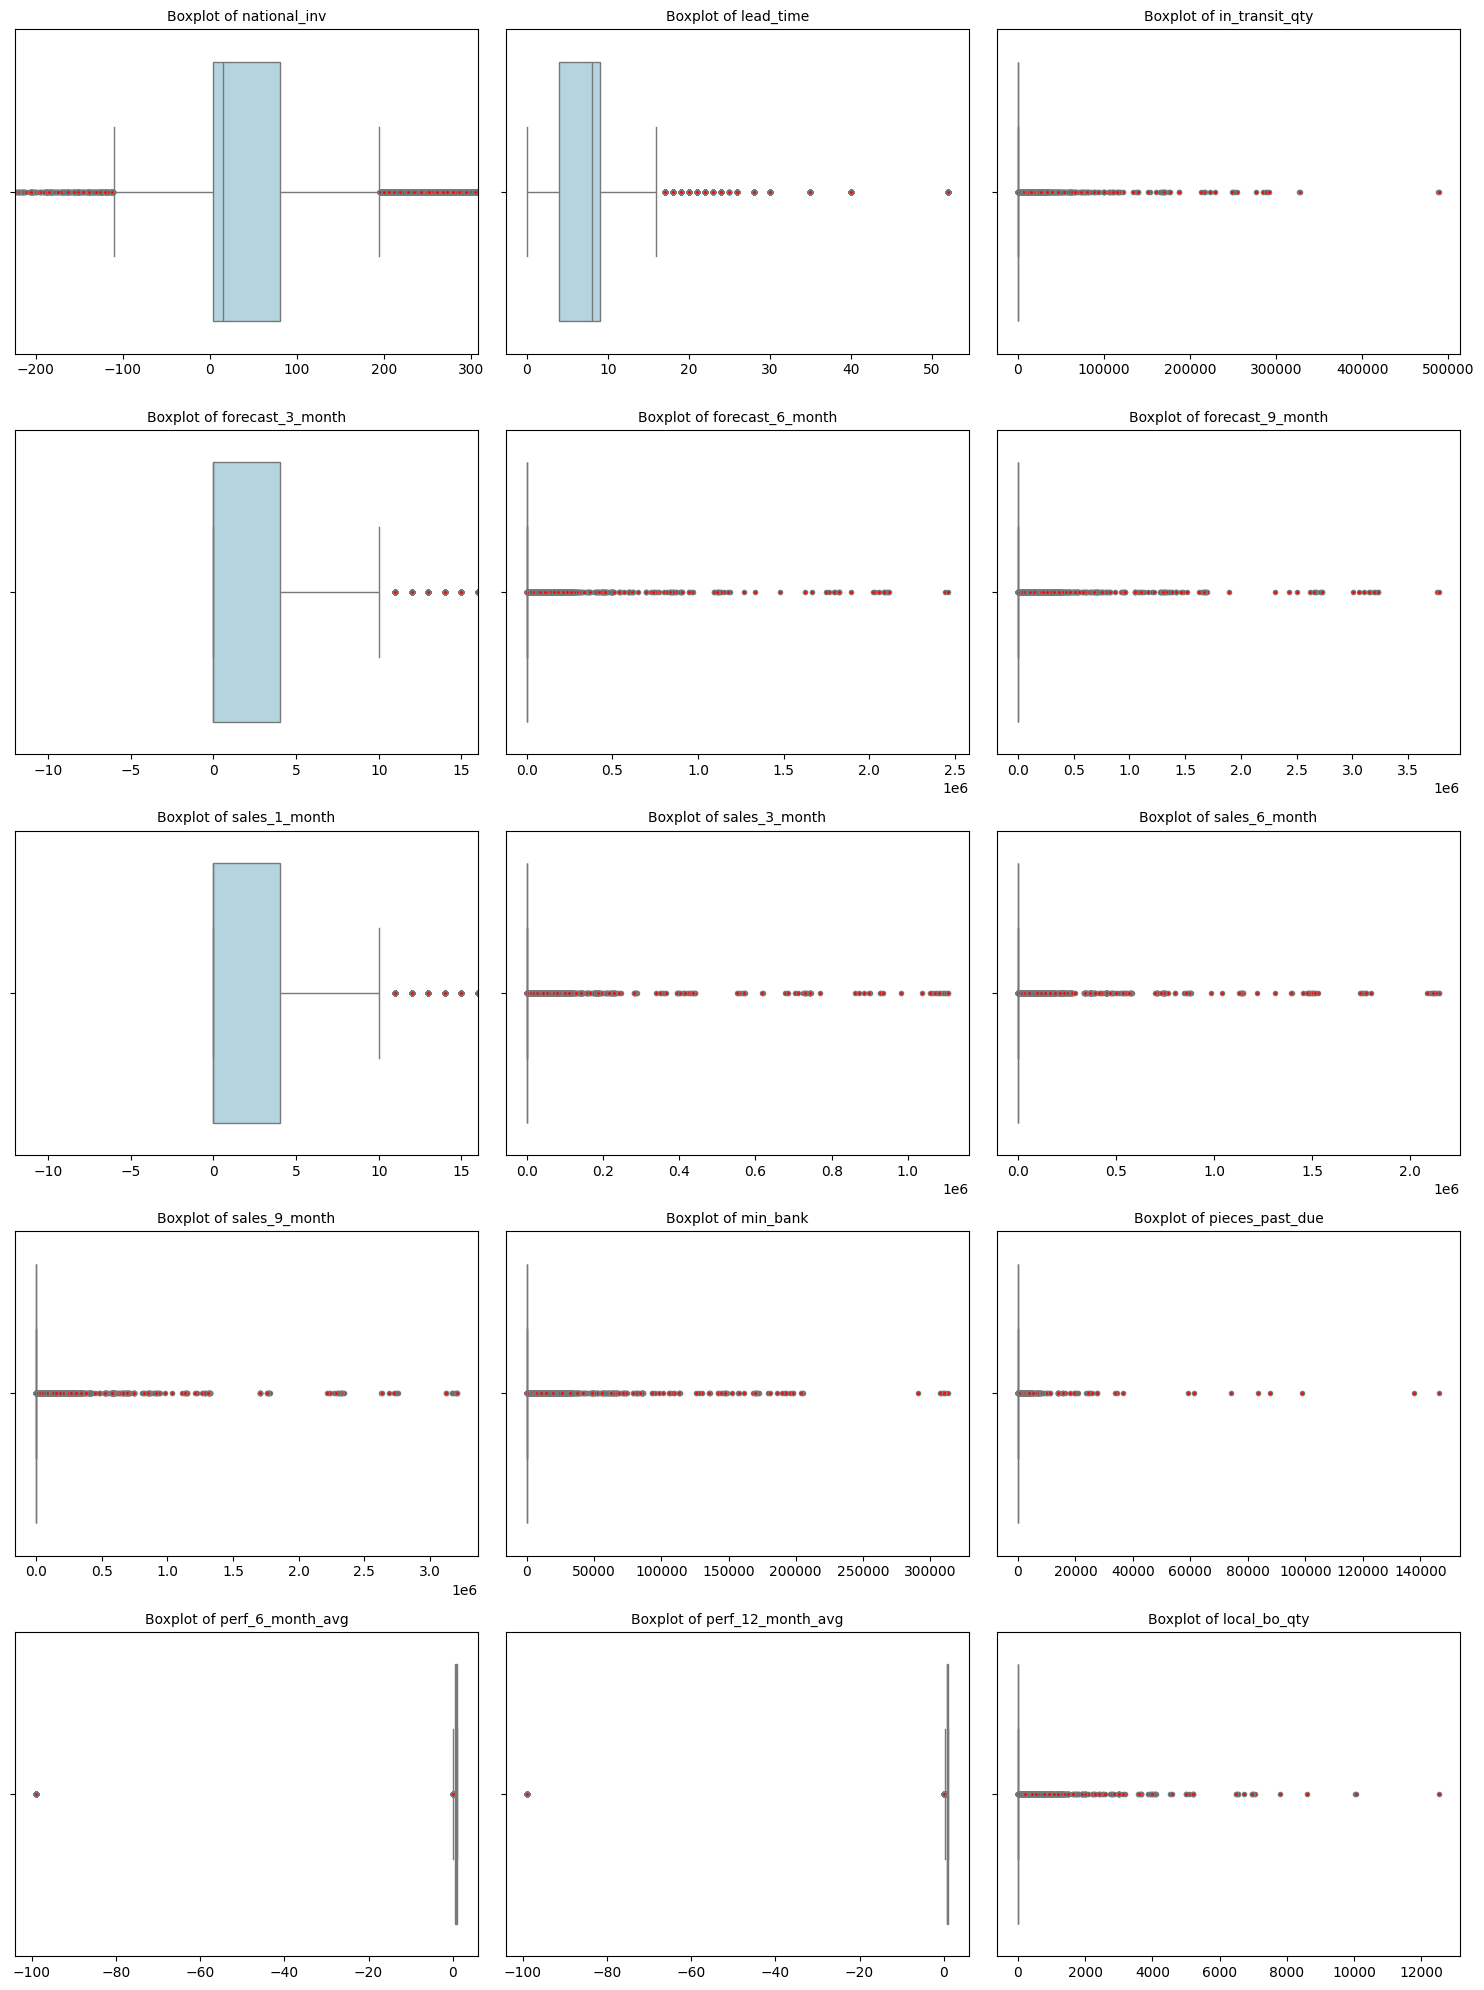

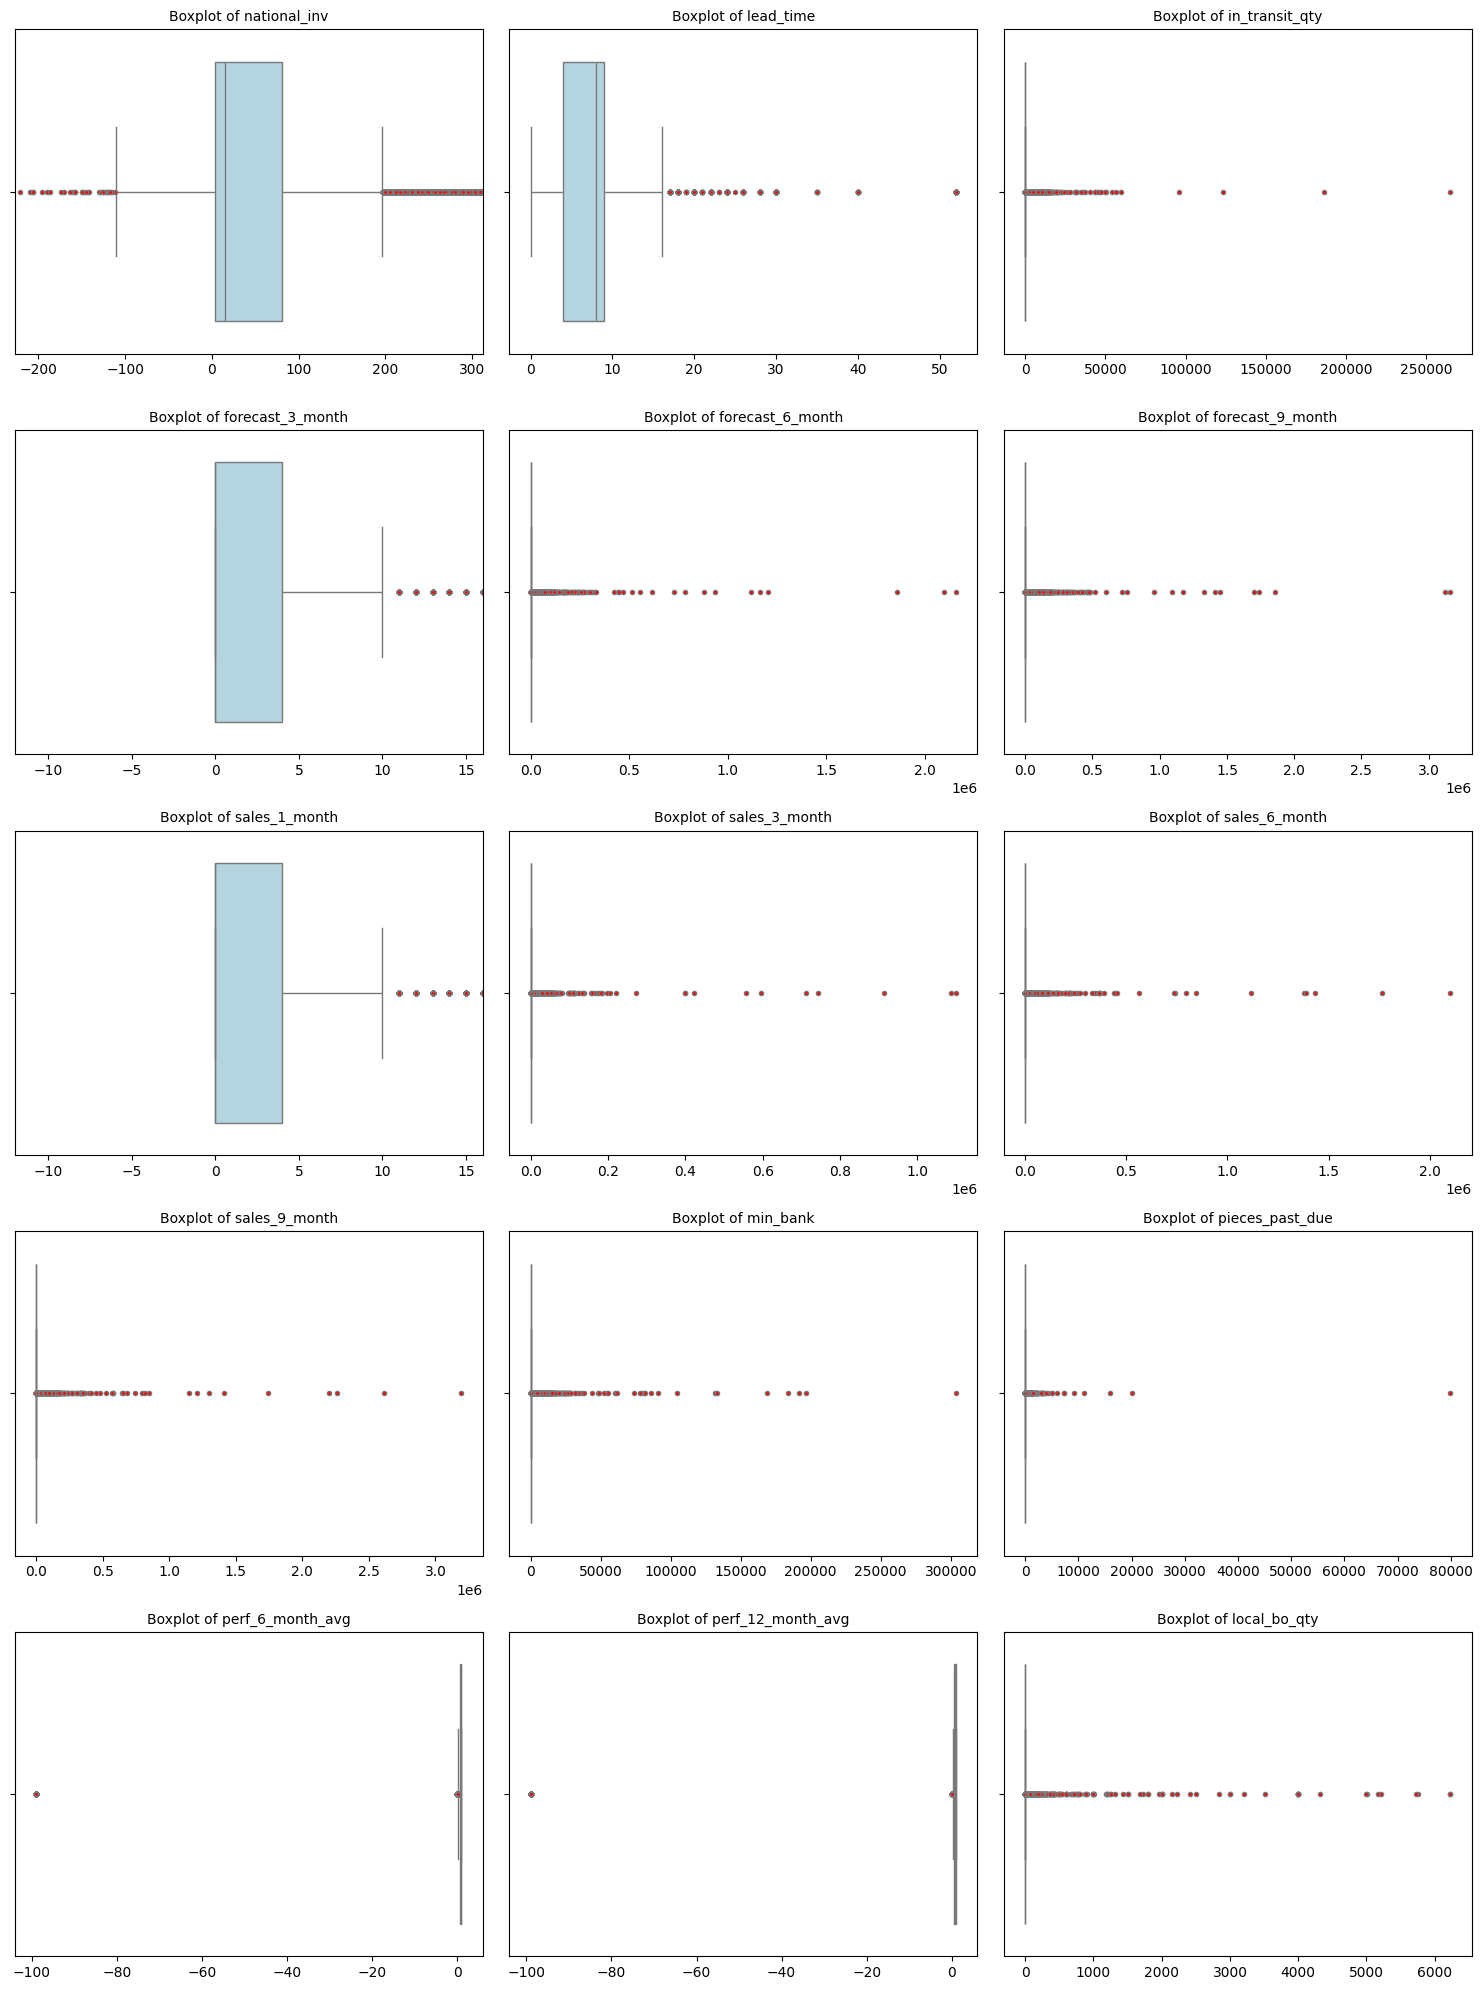

In [ ]:
boxplot(train)
boxplot(test)

In [ ]:
# Scatter plot
def pairwise_scatter(df, sample_size=None, grid=True):
  numeric_cols = df.select_dtypes(include=['number']).columns
  n_cols = len(numeric_cols)

  if sample_size and len(df) > sample_size:
      df = df.sample(sample_size)

  plt.figure(figsize=(25, 25))


  combinations = list(itertools.combinations(numeric_cols, 2))

  for i, (x_col, y_col) in enumerate(combinations, 1):
    plt.subplot(n_cols, n_cols, i)

    plt.scatter(x=df[x_col],
                y=df[y_col],
                color='skyblue',
                alpha=0.5,
                s=8,
                edgecolor='black',
                linewidth=0.3)

    plt.title(f'{x_col} vs {y_col}', fontsize=8, pad=4)
    plt.xlabel(x_col, fontsize=6)
    plt.ylabel(y_col, fontsize=6)

    if grid:
        plt.grid(alpha=0.2)

  plt.tight_layout(pad=1.0)
  plt.show()

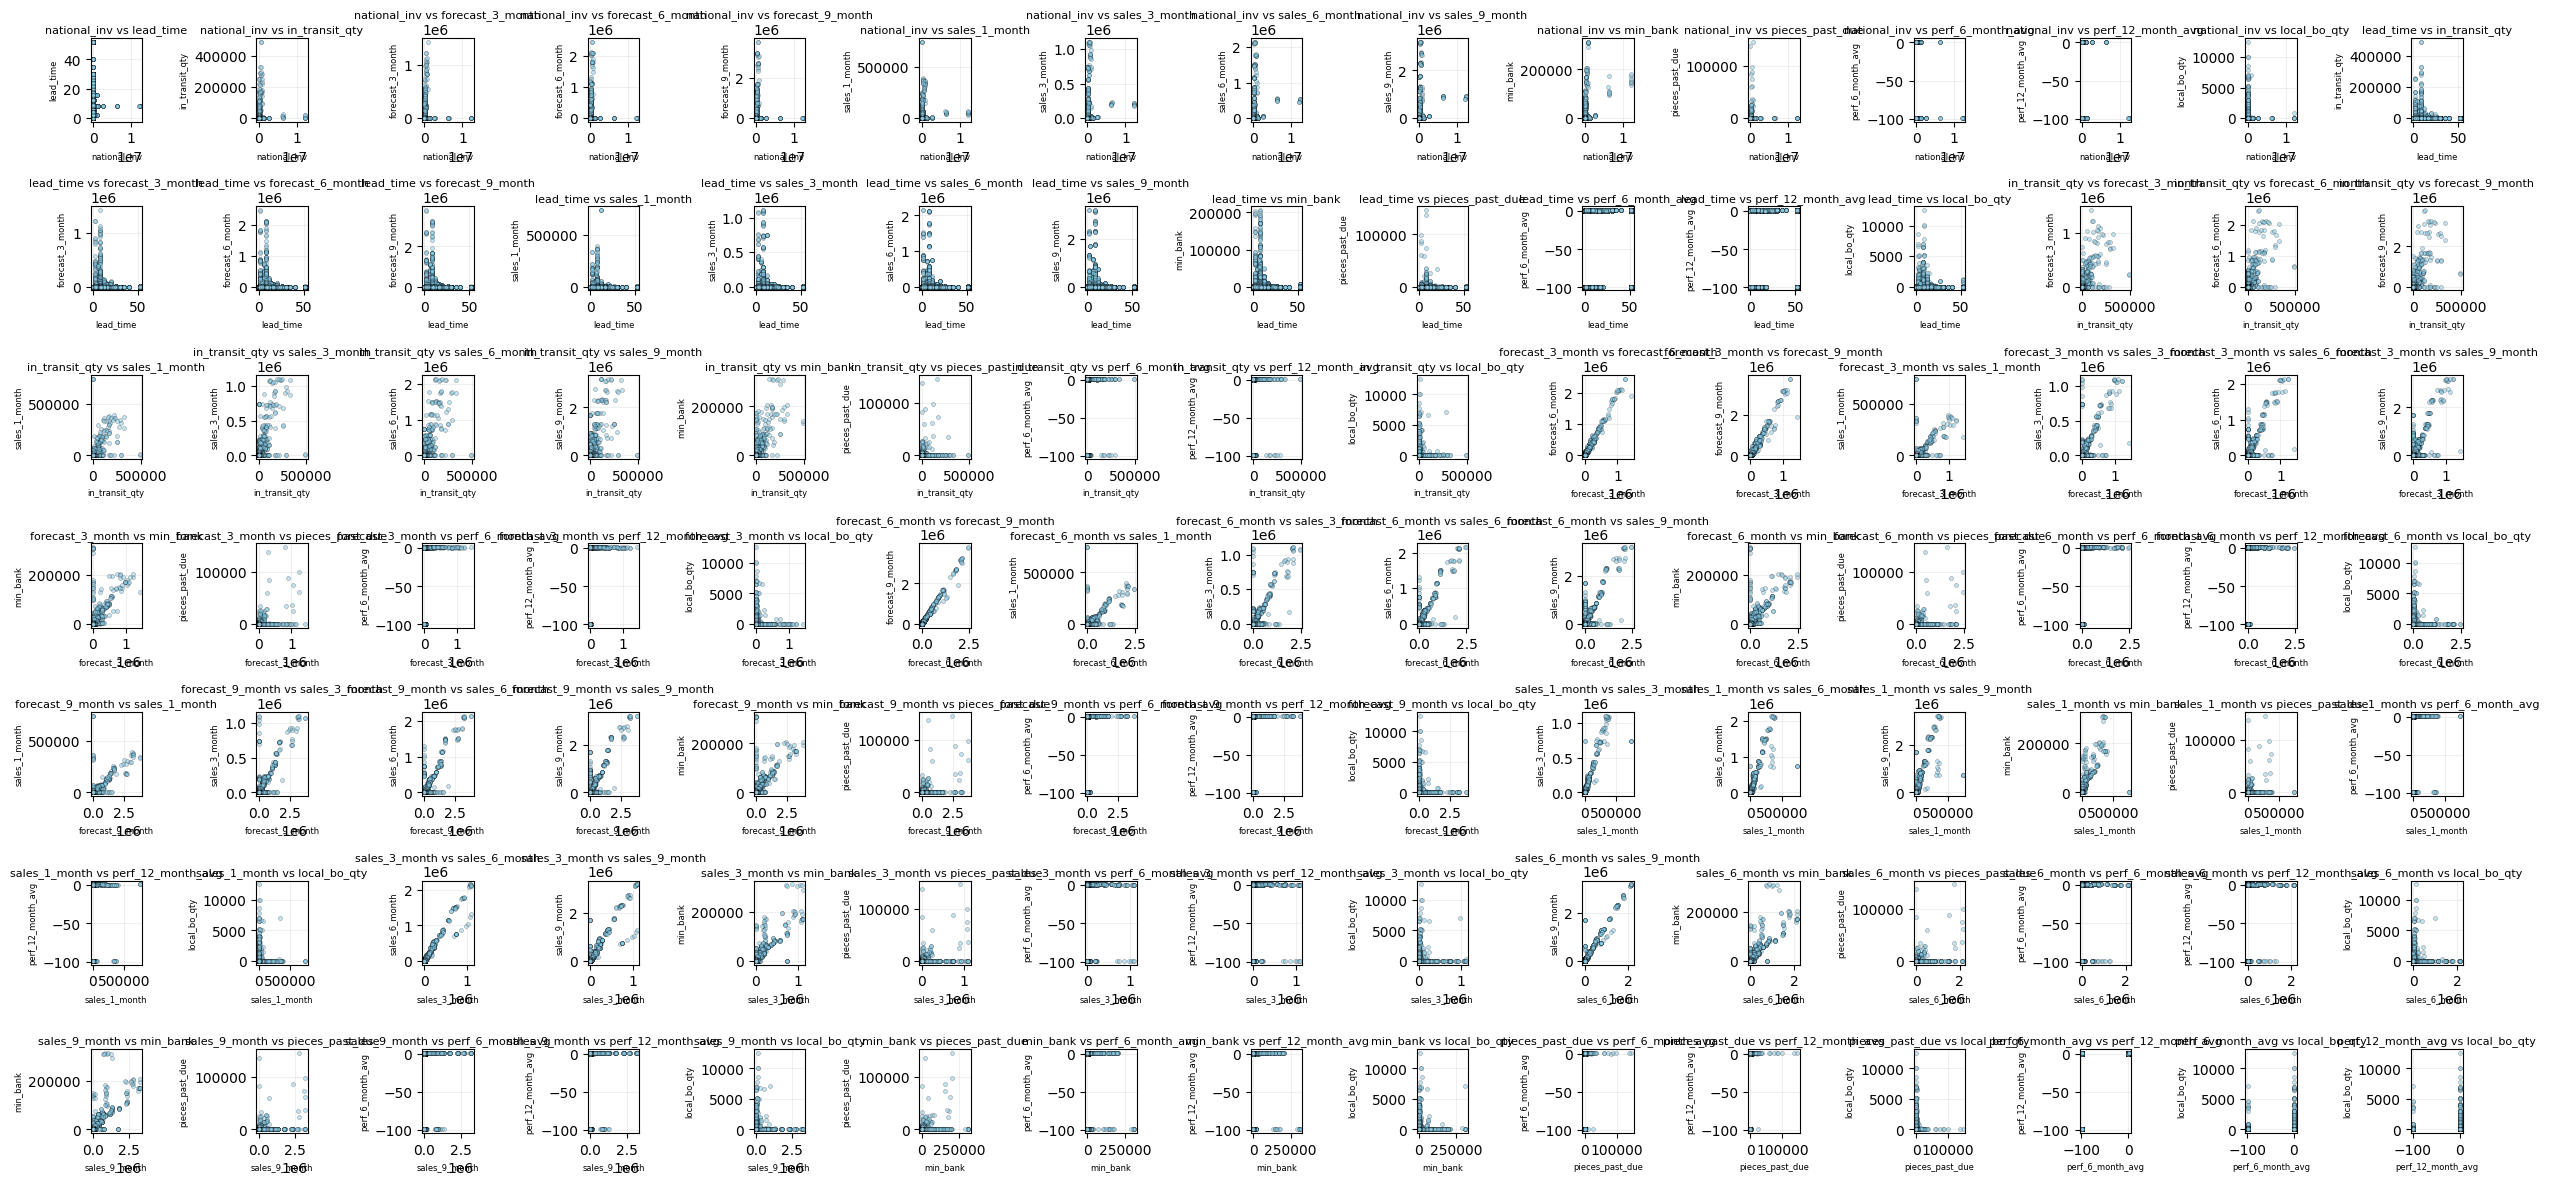

In [ ]:
pairwise_scatter(train)

In [ ]:
# Pie Chart
def pie_chart(df):
  class_counts = df['went_on_backorder'].value_counts()

  plt.figure(figsize=(8, 6))
  plt.pie(class_counts,
          labels=['No', 'Yes'],
          autopct='%1.1f%%',
          startangle=90,
          colors=['#66b3ff', '#ff9999'],
          explode=(0.1, 0))

  plt.title('Distribution of Backorder Classes', fontsize=14, pad=20)


  plt.axis('equal')
  plt.tight_layout()
  plt.show()

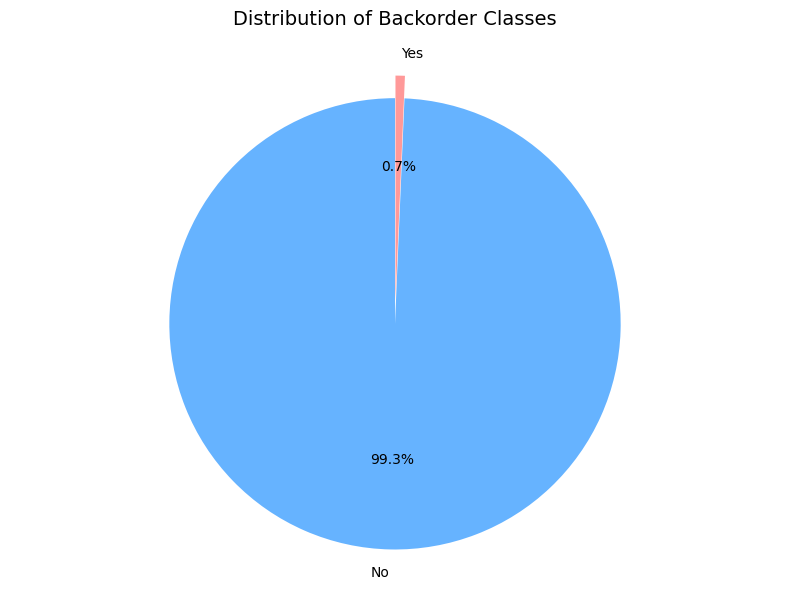

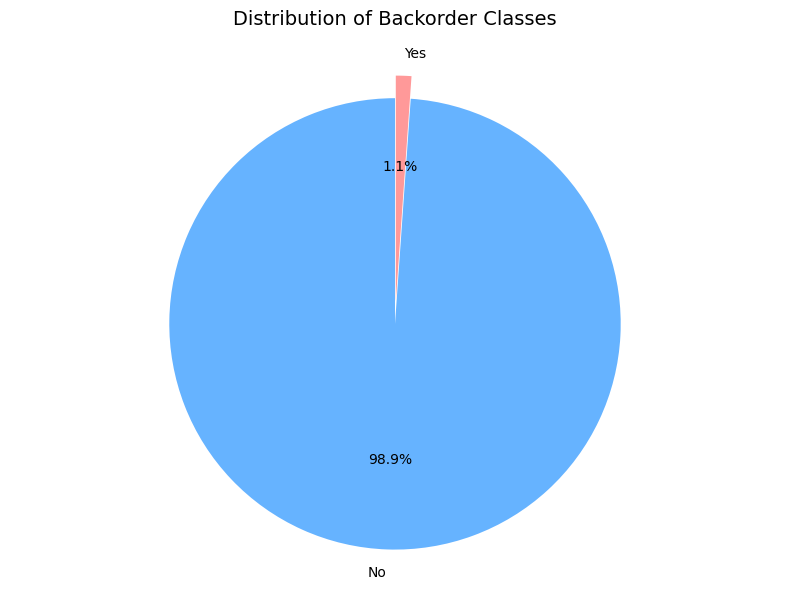

In [ ]:
pie_chart(train)
pie_chart(test)

In [ ]:
# Correlation
train.select_dtypes(include="number").corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003326,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,-0.013544,-0.010732,0.014887
lead_time,0.003326,1.000000,-0.007238,-0.008010,-0.008513,-0.008738,-0.006013,-0.007279,-0.007270,-0.007313,-0.008198,-0.001500,-0.099940,-0.106019,-0.001306
in_transit_qty,0.098238,-0.007238,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.003282,0.004292,0.066612
forecast_3_month,0.078199,-0.008010,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.008445,0.008694,0.039419
forecast_6_month,0.079744,-0.008513,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.008343,0.008499,0.039724
forecast_9_month,0.078948,-0.008738,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.008306,0.008421,0.039732
sales_1_month,0.147449,-0.006013,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.001163,0.002370,0.066188
sales_3_month,0.192605,-0.007279,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.001488,0.002837,0.071030
sales_6_month,0.225067,-0.007270,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.002898,0.004221,0.057765
sales_9_month,0.239613,-0.007313,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.003438,0.004749,0.048880


<Axes: >

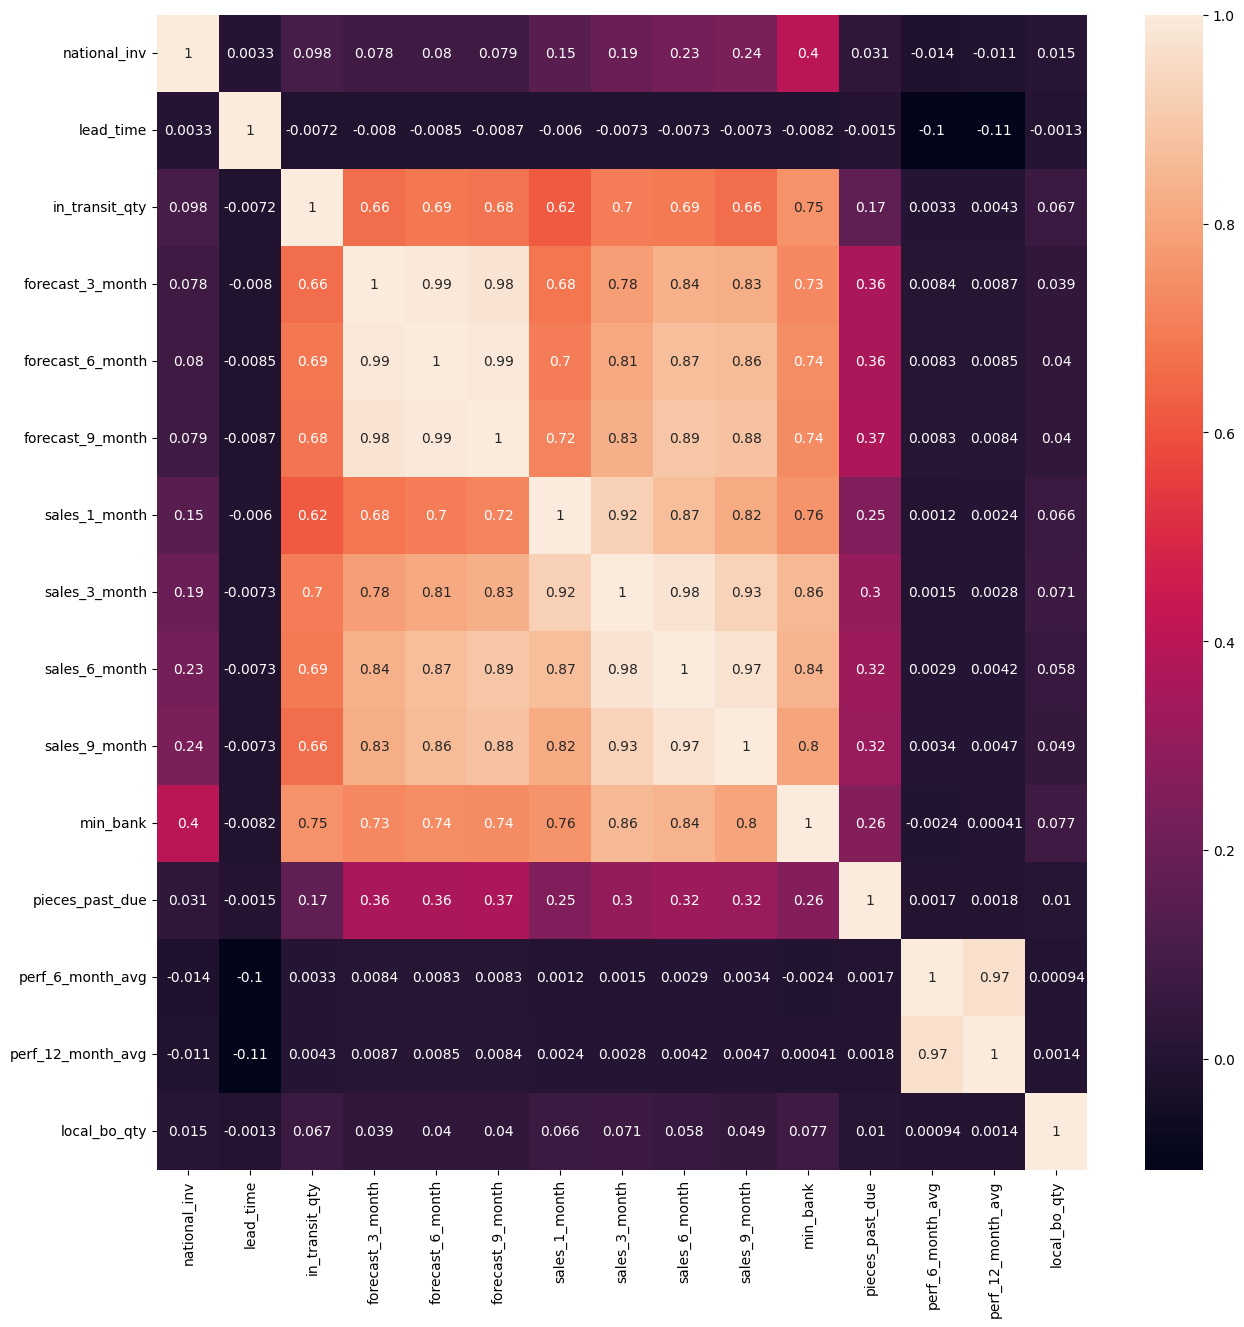

In [ ]:
# Correlation
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include="number").corr(), annot=True)

In [ ]:
# Negative count
negative_index = []

for i in numeric_cols:
  for x in train.index:
    if train.loc[x, i] < 0:
      negative_index.append(x)

print(train.loc[negative_index])
print(len(negative_index))

             sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
176      1111655         -55.0        8.0             2.0             428.0   
191      1111670        -499.0       12.0           350.0            3452.0   
342      1111821         -48.0        8.0            97.0              67.0   
552      1112031          -1.0       12.0             0.0               6.0   
916      1112396         -94.0        9.0            80.0               5.0   
...          ...           ...        ...             ...               ...   
1687724  1406654          42.0        NaN             0.0               0.0   
1687835  1588495         227.0        NaN             8.0               0.0   
1687847  1375861        -206.0        NaN             0.0             760.0   
1687850  1446671          -2.0        NaN             0.0               0.0   
1687856  1373987          -1.0        NaN             0.0               5.0   

         forecast_6_month  forecast_9_month  sales_